
-----

# 📘 ML Project - Week 3: Model Creation, Evaluation & Tuning
-----

## 1\. Setup & Data Preparation
**Q1:** Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

sns.set(style="whitegrid")
%matplotlib inline

**Q2:** Load the  dataset and display the first 5 rows.

In [2]:
df = pd.read_csv('cardio_cleaned_week2.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bmi_cat
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.4,21.97,2
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.4,34.93,4
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.6,23.51,2
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.2,28.71,3
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.8,23.01,2


**Q3:** Separate the dataset into Features (`X`) and Target (`y`).

In [3]:
X = df.drop(['cardio','age','bmi_cat'], axis=1)
y = df['cardio']

-----

## 2\. Train-Test Split (Step 1)
**Q4:** Split the dataset into Training(80%) and Testing (20%) .

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape:  {X_test.shape}")

Training Shape: (54911, 13)
Testing Shape:  (13728, 13)


-----

## 3\. Normalization / Scaling (Step 2)

**Q6:** Scale the data:

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Scaled Successfully.")

Data Scaled Successfully.


-----

## 4\. Model Training (Random Forest)
**Q8:** Initialize the **Random Forest Classifier**.

In [6]:
# model = RandomForestClassifier(n_estimators=100, random_state=42)
model = RandomForestClassifier(
    n_estimators=200,     
    max_depth=10,         
    min_samples_leaf=10,   
    min_samples_split=10,
    random_state=42
)

**Q9:** Train (fit) the model using the **Scaled Training Data**.

In [7]:
model.fit(X_train_scaled, y_train)
print("Model Trained.")

Model Trained.


-----

## 5. Evaluation 

**Q10:** predictions on the **Scaled Test Set** (`X_test_scaled`).

In [8]:
y_pred = model.predict(X_test_scaled)

**Q11:** Calculate the **Accuracy Score**.

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 72.89%


**Q12:** Display the **Confusion Matrix** using a Heatmap.


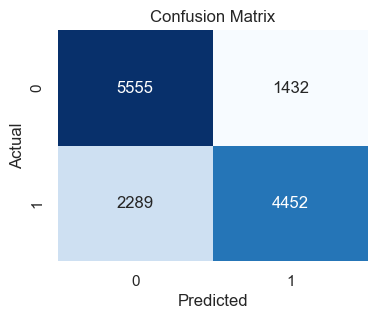

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Q13:** Print the full **Classification Report** (Precision, Recall, F1-Score).

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6987
           1       0.76      0.66      0.71      6741

    accuracy                           0.73     13728
   macro avg       0.73      0.73      0.73     13728
weighted avg       0.73      0.73      0.73     13728



-----

## 6. Overfitting & Underfitting Check 

**Q14:** check Overfitting

In [12]:
y_train_pred = model.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy:  {test_acc*100:.2f}%")

if (train_acc - test_acc) > 0.10:
    print("Warning: Potential Overfitting detected.")
else:
    print("Good Fit: Train and Test scores are balanced.")

Training Accuracy: 74.97%
Testing Accuracy:  72.89%
Good Fit: Train and Test scores are balanced.


-----

## 7. Hyperparameter Tuning 

**Q16:**  Grid Search Setup.

In [13]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

**Q17:** Run Tuning:

In [14]:
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print(f"Best CV Accuracy: {grid_search.best_score_ * 100:.2f}%")

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 73.37%


-----

## 8\. Final Model Export

*We must save BOTH the Model and the Scaler. If we don't save the scaler, we cannot correctly process new user input in the Flask app (Week 4/5).*

**Q20:** Save the best model (from grid search) and the scaler to a single pickle file (`cardio_model_week3.pkl`).

In [15]:
data_to_save = {
    "model": best_model,
    "scaler": scaler
}

with open('cardio_model_week3.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)

print("Model and Scaler saved to 'cardio_model_week3.pkl'")

Model and Scaler saved to 'cardio_model_week3.pkl'
